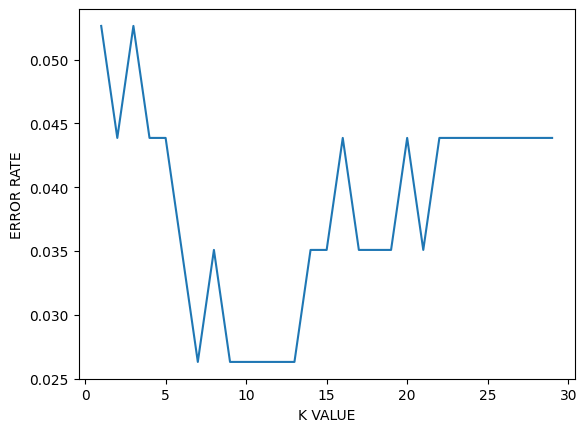

EN İYİ K DEGERİ = 3
model KNeighborsClassifier(n_neighbors=3)
model2 KNeighborsClassifier(n_neighbors=3)
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score: 0.9649122807017544


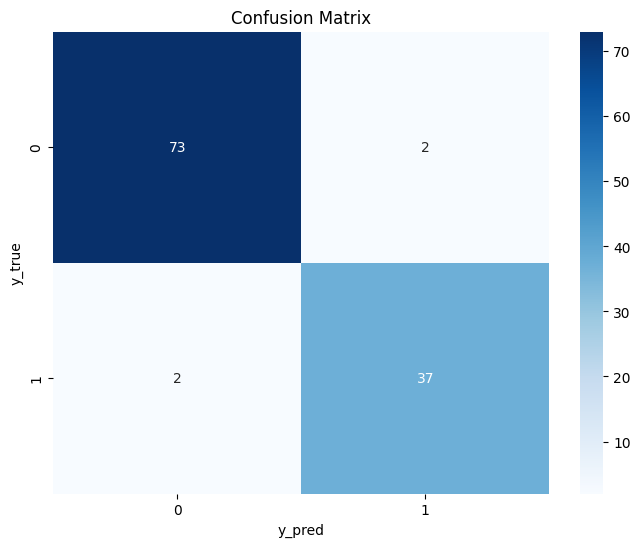

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import seaborn as sns


class Knn:
    test_error_rates = []

    def preprocessing(self, X_train, X_test):
        scaler = StandardScaler()
        scaled_X_train = scaler.fit_transform(X_train)
        scaled_X_test = scaler.transform(X_test)
        return scaled_X_train, scaled_X_test

    def train(self, X_train, X_test, y_train,classifier):
        scaled_X_train, scaled_X_test = self.preprocessing(X_train, X_test)
        model = classifier
        print("model" , model)
        model.fit(scaled_X_train, y_train)
        print("model2" , model)

        return model

    def evaluate(self, model, X_test, y_test):
        scaled_X_test = StandardScaler().fit_transform(X_test)
        y_pred = model.predict(scaled_X_test)
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Accuracy Score:", accuracy_score(y_test, y_pred))
        return y_pred

    def elbow_method(self, X_train, X_test, y_train, y_test):
        for k in range(1, 30):
            knn_model = KNeighborsClassifier(n_neighbors=k)
            knn_model.fit(X_train, y_train)
            y_pred_test = knn_model.predict(X_test)
            test_error = 1 - accuracy_score(y_test, y_pred_test)
            self.test_error_rates.append(test_error)

    def plot_elbow_errrate(self):
        plt.plot(range(1, 30), self.test_error_rates)
        plt.ylabel("ERROR RATE")
        plt.xlabel("K VALUE")
        plt.show()
    def grid_search(self):
        scaler = StandardScaler()
        knn = KNeighborsClassifier()
        operations = [("scaler" , scaler) , ("knn" , knn)]
        pipe=Pipeline(operations)
        k_values = list(range(1,20))
        param_grid = {"knn__n_neighbors" : k_values}
        full_cv_classifier = GridSearchCV(pipe , param_grid=param_grid ,
                                          cv= 5 , scoring="accuracy",)
        #ARTIK SCALE YAPMAMA GEREK YOK CUNKU PİPE 'DA SCALE İŞLEMİ DE YAPILACAK                                          
        full_cv_classifier.fit(X_train ,y_train)
        return full_cv_classifier.best_estimator_.get_params()

# Veri setini yükle
df = pd.read_csv("prepdata.csv").drop("Unnamed: 0", axis=1)
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Knn sınıfını kullanarak modeli eğit, değerlendir ve hata oranlarını görselleştir
knn = Knn()
knn.elbow_method(X_train, X_test, y_train, y_test)
knn.plot_elbow_errrate()

#GRİD SEARCH
optimal_k_value = knn.grid_search()['knn__n_neighbors']
print("EN İYİ K DEGERİ =" , optimal_k_value )  

# K-NN modelini eğit
knn_model = KNeighborsClassifier(n_neighbors=optimal_k_value)
knn.train(X_train, X_test, y_train, knn_model)

# Modeli değerlendir
y_pred = knn.evaluate(knn_model, X_test, y_test)

# cm = confusion_matrix(y_test, y_pred)

# # Confusion matrixi görselleştir
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
# disp.plot()
# plt.title('Confusion Matrix')
# plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

***SVM***

In [7]:
# from sklearn.svm import SVC
# df = pd.read_csv("prepdata.csv").drop("Unnamed: 0", axis=1)
# X = df.drop("diagnosis", axis=1)
# y = df["diagnosis"]
# svm = SVC()
# from svm_margin_plot import plot_svm_boundary
# from sklearn.model_selection import GridSearchCV
# param_grid = {"C" :[0.01 , 0.1 ,1] , "kernel" : ["linear"  , "rbf"] }
# grid = GridSearchCV(svm , param_grid) 
# grid.fit(X , y)
# grid_preds =grid.predict(X_test)
# disp =ConfusionMatrixDisplay(confusion_matrix(y_test  ,grid_preds) , display_labels=["Class 0", "Class 1"])
# disp.plot()

NAİVE BAYES

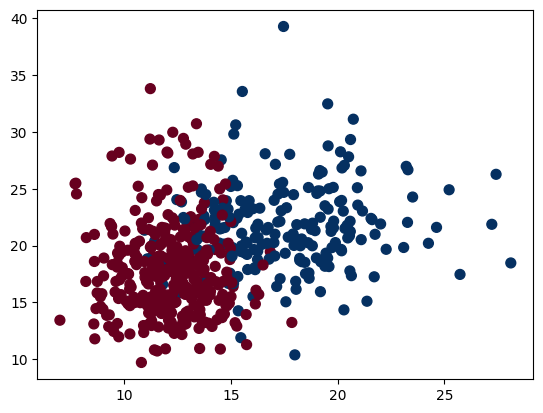

In [8]:
plt.scatter(X.values[:,0] ,X.values[:,1] , c=y , s=50 , cmap="RdBu")

In [9]:
from sklearn.naive_bayes import GaussianNB
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test = scale.transform(X_test)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)


0.9385964912280702

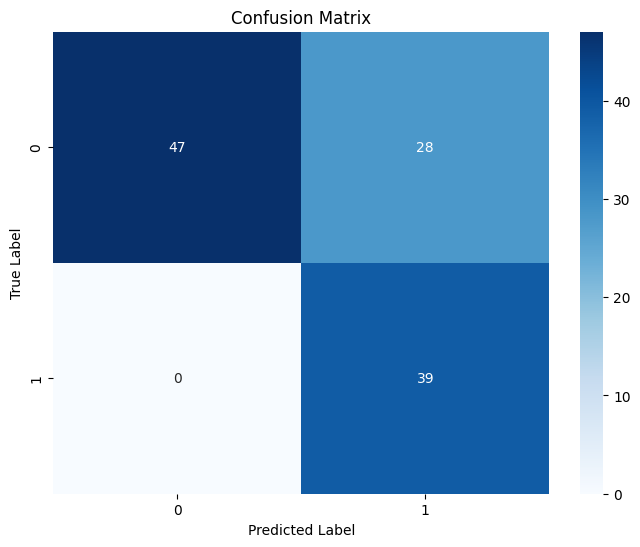

accuracy 0.7543859649122807


In [10]:
class NaiveBayesBatch:
    def __init__(self):
        self.scale = StandardScaler()
        self.model = GaussianNB()
        self.batch_size = 32

    def train_evaluate(self, X_train, X_test, y_train, y_test):
        # Veriyi batchlere ayır
        train_batch_generator = self._batch_generator(X_train, y_train)
        
        # Modeli eğit
        for X_batch, y_batch in train_batch_generator:
            X_batch_scaled = self.scale.fit_transform(X_batch)
            self.model.partial_fit(X_batch_scaled, y_batch, classes=np.unique(y_train))
        
        # Test verisi için tahmin yap
        y_pred = []
        test_batch_generator = self._batch_generator(X_test, y_test)
        for X_batch, y_batch in test_batch_generator:
            X_batch_scaled = self.scale.transform(X_batch)
            y_pred_batch = self.model.predict(X_batch_scaled)
            y_pred.extend(y_pred_batch)
        
        # Accuracy değerini hesapla
        accuracy = accuracy_score(y_test, y_pred)
        
        # Değerlendirme
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Confusion matrix görselleştirme
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()
        
        # Classification report ve accuracy score gösterme
        pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
        print("accuracy" ,accuracy)
    def _batch_generator(self, X, y):
        num_samples = len(X)
        num_batches = (num_samples + self.batch_size - 1) // self.batch_size
        for batch_idx in range(num_batches):
            start_idx = batch_idx * self.batch_size
            end_idx = min((batch_idx + 1) * self.batch_size, num_samples)
            yield X[start_idx:end_idx], y[start_idx:end_idx]



naive_bayes = NaiveBayesBatch()
naive_bayes.train_evaluate(X_train, X_test, y_train, y_test)